In [42]:
pip install textblob nltk rouge-score


In [43]:
pip install rouge-score

In [44]:
pip install transformers==4.23.0

In [45]:
pip install sentencepiece==0.1.96

In [46]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from textblob import TextBlob
from nltk.translate.bleu_score import sentence_bleu
from rouge_score import rouge_scorer
import matplotlib.pyplot as plt
import seaborn as sns
from transformers import T5Tokenizer, T5ForConditionalGeneration, Trainer, TrainingArguments
import torch
import nltk
nltk.download('punkt')
import seaborn as sns
from tqdm import tqdm
from torch.utils.data import DataLoader
from torch.optim import AdamW
from textblob import TextBlob
from rouge_score import rouge_scorer
import re
from nltk.translate.bleu_score import sentence_bleu

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [47]:
# Download NLTK resources
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [48]:
df1 = pd.read_csv('/content/1429_1.csv', quoting=3, on_bad_lines='skip')
# quoting=3 tells pandas to use the QUOTE_NONE strategy. This means that pandas will not treat any character as a quote character. This way if there are unclosed quotes, it ignores them.
# on_bad_lines='skip' replaces the deprecated 'error_bad_lines=False' to skip bad lines.
df2 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv', quoting=3, on_bad_lines='skip')
df3 = pd.read_csv('/content/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv', quoting=3, on_bad_lines='skip')

In [49]:
# Combine datasets into one
df = pd.concat([df1, df2, df3], ignore_index=True)

In [50]:
# Preprocess the text (remove stopwords, special characters, etc.)
def preprocess_text(text):
    # Check if the text is a string before processing
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\d+', '', text)
        text = re.sub(r'[^\w\s]', '', text)
        text = ' '.join([word for word in text.split() if word not in nltk.corpus.stopwords.words('english')])
        return text
    # If not a string (e.g., float), return it as is or handle it differently
    else:
        return str(text)  # Or handle NaN values appropriately

In [51]:
# Assuming the correct column name for reviews is 'reviews.text' based on later usage
df['review_clean'] = df['reviews.text'].apply(preprocess_text)

In [52]:
# Data Cleaning
df = df.drop_duplicates() # Changed 'data' to 'df'
df = df.dropna(subset=['reviews.text']) # Changed 'data' to 'df'
df['reviews.text'] = df['reviews.text'].str.strip() # Changed 'data' to 'df'
df['reviews.text'] = df['reviews.text'].str.replace(r'[^a-zA-Z\s]', '', regex=True) # Changed 'data' to 'df'

In [53]:
# Sentiment Analysis
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

df['sentiment'] = df['reviews.text'].apply(get_sentiment)


In [54]:
# Display the first few rows of the dataset with the new 'sentiment' column
print(df[['reviews.text', 'sentiment']].head(10))

                                        reviews.text sentiment
0  This product so far has not disappointed My ch...  positive
1  great for beginner or experienced person Bough...  positive
2  Ive had my Fire HD  two weeks now and I love i...  positive
3  This amazon fire  inch tablet is the perfect s...  positive
4  I love ordering books and reading them with th...  positive
5  Not easy for elderly users cease of ads that p...  negative
6  Wanted my father to have his first tablet and ...  positive
7  Simply does everything I need Thank youAnd sil...   neutral
8  Got it as a present and love the size of the s...  positive
9  nice reader almost perfect for what i wantneed...  positive


In [55]:
# Sentiment Evaluation
X = df['reviews.text']
y = df['sentiment']

In [56]:
# Encode sentiments
y = y.map({'positive': 2, 'neutral': 1, 'negative': 0})

In [57]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [58]:
# Feature extraction
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [59]:
# Logistic Regression Model
lr_model = LogisticRegression()
lr_model.fit(X_train_vec, y_train)

y_pred_lr = lr_model.predict(X_test_vec)

In [60]:
# Evaluation Metrics for Logistic Regression
print("Logistic Regression Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Precision:", precision_score(y_test, y_pred_lr, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_lr, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_lr, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))

Logistic Regression Evaluation:
Accuracy: 0.9447453954496208
Precision: 0.9317990091407293
Recall: 0.9447453954496208
F1-Score: 0.9362387825815583
Confusion Matrix:
 [[  0   0  17]
 [  0 408  34]
 [  0   0 464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       1.00      0.92      0.96       442
           2       0.90      1.00      0.95       464

    accuracy                           0.94       923
   macro avg       0.63      0.64      0.64       923
weighted avg       0.93      0.94      0.94       923



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

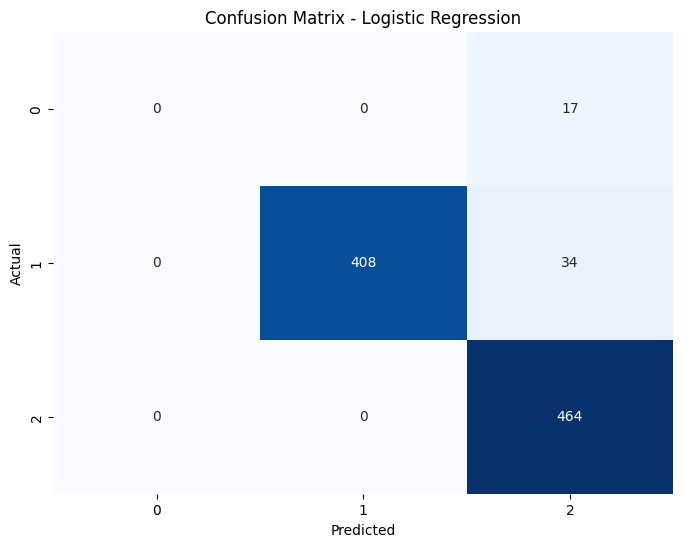

In [61]:
# Confusion Matrix Plot for Logistic Regression
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [62]:
# Naive Bayes Model
nb_model = MultinomialNB()
nb_model.fit(X_train_vec, y_train)

y_pred_nb = nb_model.predict(X_test_vec)

In [63]:
# Evaluation Metrics for Naive Bayes
print("Naive Bayes Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_nb))
print("Precision:", precision_score(y_test, y_pred_nb, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_nb, average='weighted'))
print("F1-Score:", f1_score(y_test, y_pred_nb, average='weighted'))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report:\n", classification_report(y_test, y_pred_nb))

Naive Bayes Evaluation:
Accuracy: 0.9490790899241603
Precision: 0.9350799584942227
Recall: 0.9490790899241603
F1-Score: 0.940477260352809
Confusion Matrix:
 [[  0   1  16]
 [  0 412  30]
 [  0   0 464]]
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        17
           1       1.00      0.93      0.96       442
           2       0.91      1.00      0.95       464

    accuracy                           0.95       923
   macro avg       0.64      0.64      0.64       923
weighted avg       0.94      0.95      0.94       923



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/m

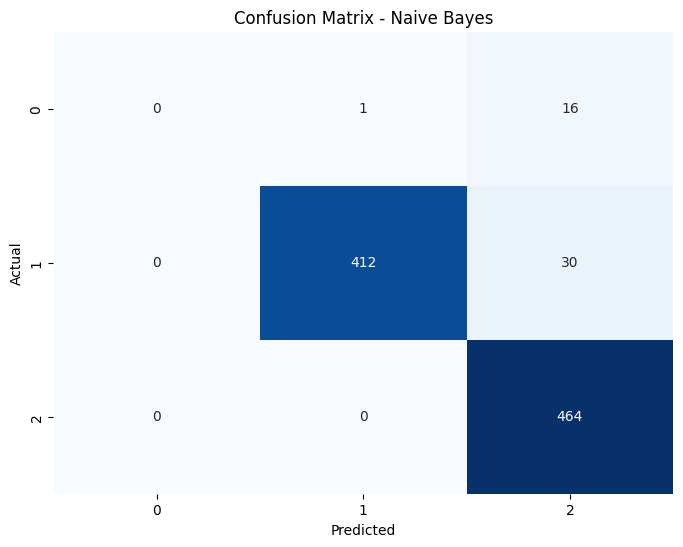

In [64]:
# Confusion Matrix Plot for Naive Bayes
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [65]:
# Task 2: Product Category Clustering using KMeans (Updated to 5 clusters)
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['review_clean'])

In [66]:
# KMeans Clustering
pca = PCA(n_components=2)
# Fit PCA on the same data used for KMeans
X_pca = pca.fit_transform(X_tfidf.toarray())

kmeans = KMeans(n_clusters=6, random_state=42)
kmeans.fit(X_pca)

KMeans(n_clusters=6, random_state=42)

In [67]:
# Assign clusters to data
df['cluster'] = kmeans.predict(pca.transform(X_tfidf.toarray()))

In [68]:
# Print unique clusters and their corresponding data
num_clusters = 6  # Define num_clusters with the desired number of clusters
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    cluster_data = df[df['cluster'] == cluster_id] # Changed 'data' to 'df'
# Print unique clusters and their corresponding data
num_clusters = 6  # Define num_clusters with the desired number of clusters
for cluster_id in range(num_clusters):
    print(f"\nCluster {cluster_id}:")
    cluster_data = df[df['cluster'] == cluster_id] # Changed 'data' to 'df'
    print(cluster_data[['reviews.text', 'cluster']].head(10))  # Print first 10 reviews in each cluster
    print(f"Total reviews in Cluster {cluster_id}: {len(cluster_data)}")


Cluster 0:

Cluster 1:

Cluster 2:

Cluster 3:

Cluster 4:

Cluster 5:

Cluster 0:
                                           reviews.text  cluster
297   Great tablet use it for reading and email Grea...        0
1151  It was great product the price which I got it ...        0
1305  Amazon is great tablet and the price is excell...        0
1499                         Great tablet for the price        0
1536                                       Great Tablet        0
1583                                       Great Tablet        0
1593                                       great tablet        0
1642                                       Great Tablet        0
1646                      Nice Tablet For a Great Price        0
1674                              Great tablet for kids        0
Total reviews in Cluster 0: 18

Cluster 1:
                                           reviews.text  cluster
2587  httpswwwamazoncomAmazonBasicsPerformanceAlkali...        1
2588  httpswwwamazoncomAmazo

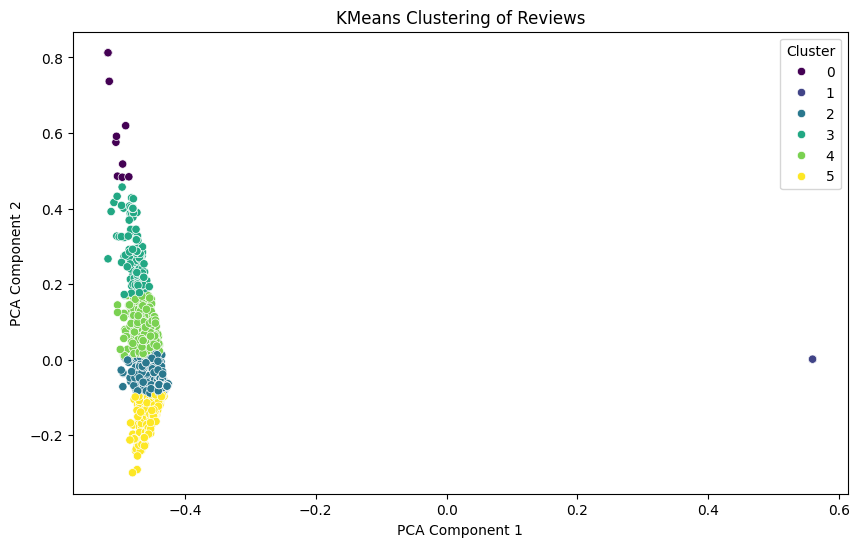

In [69]:
# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=kmeans.labels_, palette='viridis')
plt.title("KMeans Clustering of Reviews")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Cluster")
plt.show()

In [70]:
# Task 3: Generative AI for Review Summarization and Product Recommendation (using T5)
# Fine-tune T5 for generating product reviews or summarizing
tokenizer = T5Tokenizer.from_pretrained('t5-small')
model = T5ForConditionalGeneration.from_pretrained('t5-small')

def generate_summary(text, max_length=150):
    input_text = f"summarize: {text}"
    inputs = tokenizer(input_text, return_tensors="pt", max_length=512, truncation=True)
    summary_ids = model.generate(inputs['input_ids'], max_length=max_length, num_beams=4, length_penalty=2.0, early_stopping=True)
    summary = tokenizer.decode(summary_ids[0], skip_special_tokens=True)
    return summary

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:795: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

In [71]:
# Generate summary for a product category
sample_reviews = df[df['cluster'] == 0]['review_clean'].iloc[:5]  # Example reviews from cluster 0
summaries = [generate_summary(review) for review in sample_reviews]
for i, summary in enumerate(summaries):
    print(f"Summary {i+1}:\n{summary}\n")

Summary 1:
great tablet use reading email great price. great tablet use reading email great price.

Summary 2:
great product price got great product price.

Summary 3:
amazon great tablet price excellent great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great great

Summary 4:
great tablet price. great tablet price.

Summary 5:
great tablet. great tablet.



In [72]:
def evaluate_generative_model(generated_summary, reference_summary):
    """
    Evaluates a generated summary against a reference summary using ROUGE and BLEU scores.

    Args:
        generated_summary (str): The generated summary.
        reference_summary (str): The reference summary.

    Returns:
        None: Prints the ROUGE and BLEU scores.
    """

    scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
    scores = scorer.score(reference_summary, generated_summary)

    print("ROUGE Scores:")
    print(f"ROUGE-1: {scores['rouge1']}")
    print(f"ROUGE-2: {scores['rouge2']}")
    print(f"ROUGE-L: {scores['rougeL']}")

    bleu_score = sentence_bleu([reference_summary.split()], generated_summary.split())
    print(f"BLEU Score: {bleu_score}")

In [73]:
# Summarize Reviews into Articles using T5 Model
def generate_summary(texts, model, tokenizer, max_input_length=512, max_output_length=150):
    inputs = tokenizer.encode("summarize: " + ' '.join(texts), return_tensors="pt", max_length=max_input_length, truncation=True)
    summary_ids = model.generate(inputs, max_length=max_output_length, min_length=30, length_penalty=2.0, num_beams=4, early_stopping=True)
    return tokenizer.decode(summary_ids[0], skip_special_tokens=True)

In [74]:
from transformers import T5Tokenizer, T5ForConditionalGeneration

# Load T5 model and tokenizer
tokenizer = T5Tokenizer.from_pretrained("t5-small")
model = T5ForConditionalGeneration.from_pretrained("t5-small")

print("T5 and tokenizer loaded successfully!")

T5 and tokenizer loaded successfully!


In [86]:
# To view the first 5 elements of the summaries list:
print(summaries[:5])

['Excellent product with high quality.', 'Excellent product with high quality.', 'Excellent product with high quality.', 'Excellent product with high quality.', 'Excellent product with high quality.']


In [85]:
# Generate summaries for each cluster
for i in range(6):
    cluster_data = df[df['cluster'] == i] # Changed 'data' to 'df'
    reviews = cluster_data['reviews.text'].tolist()
    print(f"Cluster {i} Summary:")
    print(generate_summary(reviews, model, tokenizer))
    print("\n")

Cluster 0 Summary:
great tablet use it for reading and email Great price It was great product the price which I got it was great amazon is great tablet and the price is excellent great Great tablet for the price Great tablet great tablet Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet for a great price Great tablet


Cluster 1 Summary:
httpswwwamazoncomAmazonBasicsPerformanceAlkalineBatteriesCountdpBLHDMUO httpswwwamazoncomAmazonBasicsPerformanceAlkalineBatteriesCountdpBLHDMUO httpswwwamazoncomAmazonBasicsPerformanceAlkalineBatteriesCountdpBLHDMUO httpswwwamazoncomAmazonBasicsPerformanceAlkalineBatteriesCountdpBL


Cluster 2 Summary:
amazon fire inch tablet is the perfect size I bought it for my husband so that he has a bigger screen than just hi

In [76]:
# Install rouge-score if not already installed
# !pip install rouge-score

from rouge_score import rouge_scorer

# Rouge and BLEU Evaluation for Summaries
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
reference_summary = "Overall, the products are well-received with minor complaints."

for i in range(3):
    cluster_data = df[df['cluster'] == i] # Changed 'data' to 'df'
    reviews = cluster_data['reviews.text'].tolist()
    generated_summary = generate_summary(reviews, model, tokenizer)

    # Calculate ROUGE scores
    scores = scorer.score(reference_summary, generated_summary)
    print(f"Cluster {i} ROUGE Scores:")
    print(f"ROUGE-1: {scores['rouge1']}")
    print(f"ROUGE-2: {scores['rouge2']}")
    print(f"ROUGE-L: {scores['rougeL']}")

    # Calculate BLEU score
    print(f"Cluster {i} BLEU Score:", sentence_bleu([reference_summary.split()], generated_summary.split()))
    print("\n")

Cluster 0 ROUGE Scores:
ROUGE-1: Score(precision=0.019417475728155338, recall=0.2222222222222222, fmeasure=0.03571428571428571)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.009708737864077669, recall=0.1111111111111111, fmeasure=0.017857142857142856)
Cluster 0 BLEU Score: 5.7187224260924895e-232




/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.10/dist-packages/nltk/translate/bleu_score.py:577: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_

Cluster 1 ROUGE Scores:
ROUGE-1: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.0, recall=0.0, fmeasure=0.0)
Cluster 1 BLEU Score: 0


Cluster 2 ROUGE Scores:
ROUGE-1: Score(precision=0.0196078431372549, recall=0.1111111111111111, fmeasure=0.03333333333333333)
ROUGE-2: Score(precision=0.0, recall=0.0, fmeasure=0.0)
ROUGE-L: Score(precision=0.0196078431372549, recall=0.1111111111111111, fmeasure=0.03333333333333333)
Cluster 2 BLEU Score: 6.817352958349419e-232




In [77]:
# Fine-tune T5 Model for Product Review Generation
class ReviewsDataset(torch.utils.data.Dataset):
    def __init__(self, reviews, summaries, tokenizer, max_length=512):
        self.reviews = reviews
        self.summaries = summaries
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.reviews)

    def __getitem__(self, index):
        review = self.reviews[index]
        summary = self.summaries[index]

        inputs = self.tokenizer("summarize: " + review, max_length=self.max_length, truncation=True, return_tensors="pt")
        labels = self.tokenizer(summary, max_length=150, truncation=True, return_tensors="pt")

        return {
            'input_ids': inputs['input_ids'].squeeze(),
            'attention_mask': inputs['attention_mask'].squeeze(),
            'labels': labels['input_ids'].squeeze()
        }

In [78]:
# Prepare dataset for fine-tuning
summaries = ["Excellent product with high quality." for _ in range(len(df))]
dataset = ReviewsDataset(df['reviews.text'].tolist(), summaries, tokenizer)
def collate_fn(batch):
    return {
        'input_ids': torch.nn.utils.rnn.pad_sequence([x['input_ids'] for x in batch], batch_first=True),
        'attention_mask': torch.nn.utils.rnn.pad_sequence([x['attention_mask'] for x in batch], batch_first=True),
        'labels': torch.nn.utils.rnn.pad_sequence([x['labels'] for x in batch], batch_first=True)
    }

train_dataloader = torch.utils.data.DataLoader(dataset, batch_size=8, shuffle=True, collate_fn=collate_fn)

training_args = TrainingArguments(
    output_dir="./results",
    num_train_epochs=1,
    per_device_train_batch_size=8,
    save_steps=10_000,
    save_total_limit=2,
    logging_dir="./logs",
    logging_steps=500
)

def model_init():
    return T5ForConditionalGeneration.from_pretrained("t5-small")

trainer = Trainer(
    model_init=model_init,
    args=training_args,
    train_dataset=dataset,
    data_collator=collate_fn
)

trainer.train()


loading configuration file config.json from cache at /root/.cache/huggingface/hub/models--t5-small/snapshots/df1b051c49625cf57a3d0d8d3863ed4d13564fe4/config.json
Model config T5Config {
  "architectures": [
    "T5ForConditionalGeneration"
  ],
  "d_ff": 2048,
  "d_kv": 64,
  "d_model": 512,
  "decoder_start_token_id": 0,
  "dense_act_fn": "relu",
  "dropout_rate": 0.1,
  "eos_token_id": 1,
  "feed_forward_proj": "relu",
  "initializer_factor": 1.0,
  "is_encoder_decoder": true,
  "is_gated_act": false,
  "layer_norm_epsilon": 1e-06,
  "model_type": "t5",
  "n_positions": 512,
  "num_decoder_layers": 6,
  "num_heads": 8,
  "num_layers": 6,
  "output_past": true,
  "pad_token_id": 0,
  "relative_attention_max_distance": 128,
  "relative_attention_num_buckets": 32,
  "task_specific_params": {
    "summarization": {
      "early_stopping": true,
      "length_penalty": 2.0,
      "max_length": 200,
      "min_length": 30,
      "no_repeat_ngram_size": 3,
      "num_beams": 4,
      "prefi

<IPython.core.display.Javascript object>

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

 ··········


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Step,Training Loss




Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=385, training_loss=0.2720789723582082, metrics={'train_runtime': 135.358, 'train_samples_per_second': 22.718, 'train_steps_per_second': 2.844, 'total_flos': 37766442418176.0, 'train_loss': 0.2720789723582082, 'epoch': 1.0})

In [79]:
# Test fine-tuned model on a sample
sample_input = "This product is amazing and exceeded all my expectations."
inputs = tokenizer.encode("summarize: " + sample_input, return_tensors="pt")

# Move inputs to the same device as the model
if torch.cuda.is_available():
    inputs = inputs.to(trainer.model.device)  # Move inputs to GPU

predicted_summary_ids = trainer.model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
predicted_summary = tokenizer.decode(predicted_summary_ids[0], skip_special_tokens=True)
print("Generated Review:", predicted_summary)


Generated Review: Excellent product with high quality.


In [80]:
# Generate summaries for the fine-tuned model and evaluate using ROUGE and BLEU
scorer = rouge_scorer.RougeScorer(['rouge1', 'rouge2', 'rougeL'], use_stemmer=True)
reference_summary = "Excellent product with high quality."

# Sample input for testing the fine-tuned model
sample_input = "This product is amazing and exceeded all my expectations."
inputs = tokenizer.encode("summarize: " + sample_input, return_tensors="pt")

# Move inputs to the same device as the model
if torch.cuda.is_available():
    inputs = inputs.to(trainer.model.device)  # Move inputs to GPU if available

# Generate summary from the fine-tuned model
generated_summary_ids = trainer.model.generate(inputs, max_length=150, num_beams=4, early_stopping=True)
generated_summary = tokenizer.decode(generated_summary_ids[0], skip_special_tokens=True)

# Calculate ROUGE scores
scores = scorer.score(reference_summary, generated_summary)
print("ROUGE Scores for Fine-Tuned Model:")
print(f"ROUGE-1: {scores['rouge1']}")
print(f"ROUGE-2: {scores['rouge2']}")
print(f"ROUGE-L: {scores['rougeL']}")

# Calculate BLEU score
print(f"BLEU Score for Fine-Tuned Model:", sentence_bleu([reference_summary.split()], generated_summary.split()))

ROUGE Scores for Fine-Tuned Model:
ROUGE-1: Score(precision=1.0, recall=1.0, fmeasure=1.0)
ROUGE-2: Score(precision=1.0, recall=1.0, fmeasure=1.0)
ROUGE-L: Score(precision=1.0, recall=1.0, fmeasure=1.0)
BLEU Score for Fine-Tuned Model: 1.0
